<center>
<img src="logo.png" height="900"> 
</center>


#  Что разрешает ЗБЧ


---------------

In [1]:
import pandas as pd
pd.__version__

'2.2.3'

In [5]:
!where python

c:\Users\vlads\anaconda3\envs\stat_env\python.exe
C:\Users\vlads\AppData\Local\Programs\Python\Python310\python.exe
C:\Users\vlads\AppData\Local\Microsoft\WindowsApps\python.exe


In [3]:
!pip install tqdm

In [6]:
import numpy as np
import pandas as pd

from scipy import stats

from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
plt.style.use('ggplot')  # стиль для графиков
%matplotlib inline

# 1. Сложные распределения

ЗБЧ разрешает нам решать реальные проблемы с помощью симуляций. Например, можно оценить математическое ожидание случайной величины $\frac{1}{X}$, где $X \sim N(5; 3)$ без взятия интегралов.

In [56]:
n_obs = 10**6

norm_rv = stats.norm(loc=5, scale=3)  
x = norm_rv.rvs(n_obs)

np.mean(1/x)

np.float64(0.2975919086572819)

Если бы не было питона пришлось бы искать такой интеграл: 

$$
\mathbb{E} \left(\frac{1}{X} \right) = \int_{-\infty}^{+\infty} \frac{1}{x} \cdot \frac{1}{\sigma \sqrt{2 \pi}} \cdot  e^{-\frac{(x - 5)^2}{2 \cdot 3^2}} dx.
$$

In [66]:
from scipy import integrate

def integrand(x, a=0, sigma=1):
    return 1 / (x * sigma * (2 * np.pi) ** 0.5) * np.exp(-((x - a)**2) / (2 * sigma**2))

def intregr_expect(a=0, sigma=1):
    return integrate.quad(expect, -np.inf, np.inf, args=(a, sigma))

intregr_expect(5, np.sqrt(9))


(0.24127859676211003, 2.2424654755166142e-09)

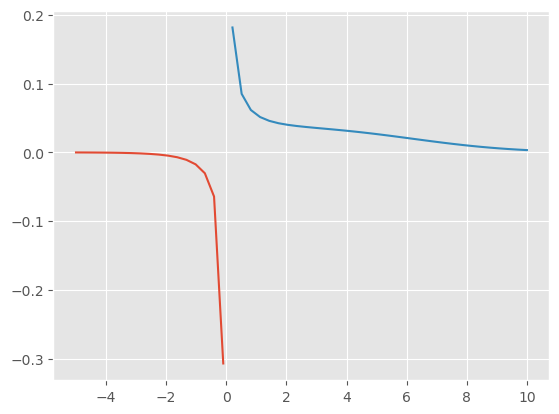

In [65]:
x = np.linspace(-5, 10)
x = x[x != 0]
y = integrand(x, 5 ,9)

plt.plot(x[x < 0], y[x < 0], x[x > 0], y[x > 0])

> __Важно:__ в видео мы с вами сказали, что для данного примера подход с симуляциями не работает. Интеграл расходится, так как этого математического ожидания не существует. При перезапуске симуляций мы каждый раз будем получать в качестве стреднего новые числа. Если мы попробуем нарисовать в динамике, к чему сходится выборочное среднее, мы увидим, что никакой сходимости тут нет. С делением случайных величин надо быть очень осторожным. 

-------------------------

__Другой пример.__ Также легко оценить многие вероятности. Например, оценим вероятность $P(X_1 + X_2 + X_3^2 > 5)$, где величины $X_i$ независимы и одинаково равномерно распределены $X_i \sim U[0;2]$:

In [ ]:
n_obs = 10**6

# обратите внимание, что в этой функции задается левая граница и длина
# а не левая и правая границы
uniform_rv = stats.uniform(0, 2)

x_1 = uniform_rv.rvs(n_obs)
x_2 = uniform_rv.rvs(n_obs)
x_3 = uniform_rv.rvs(n_obs)

success = x_1 + x_2 + x_3**2 > 5
np.sum(success) / n_obs

success[:5]

array([False, False, False,  True, False])

In [7]:
np.sum(success) / n_obs

0.14758

Здесь вектор success будет содержать значение `True` там, где условие `x_1 + x_2 + x_3**2 > 5` выполнено, и `False` там, где условие не выполнено. При сложении командой `np.sum()` каждое `True` будет посчитано как единица, а каждое `False` как ноль. Поэтому `np.sum(success)` даст количество раз, когда условие `x_1 + x_2 + x_3**2 > 5` выполнено.

__Как найти такую вероятность руками:__ 

- Первым шагом нам придётся найти распределение для $X_3^2$ 
- Втором шагом по формуле свёртки надо будет найти распределение суммы
- Третьим шагом можно посчитать вероятность

Почти на каждом шаге мы сталкиваемся с интегрированием. 

__Ещё пример.__ давайте найдём условную вероятность $P(X_1 + X_2 + X_3 > 0.8 \mid X_3 < 0.1)$. Снова используем для этого всю мощь `numpy` и сделаем срез по всем объектам, попавшим под условие.

In [78]:
n_obs = 10**6

uniform_rv = stats.uniform(0, 2)

x_1 = uniform_rv.rvs(n_obs)
x_2 = uniform_rv.rvs(n_obs)
x_3 = uniform_rv.rvs(n_obs)

uslovie = x_3 < 0.1

# x[uslovie] оставит в векторе только те элементы, где uslovie == True
success = x_1[uslovie] + x_2[uslovie] + x_3[uslovie] > 0.8
np.sum(success) / np.sum(uslovie)

np.float64(0.9293115542639543)

In [79]:
# можно посмотреть сколько раз за всю симуляцию x_3 < 0.1
np.sum(uslovie)

np.int64(49895)

__Как найти такую вероятность руками:__ 

- Первым шагом по формуле свёртки надо будет найти распределение суммы
- Вторым шагом нам надо будет найти условную плотность 
- Третьим шагом можно посчитать вероятность

__Тем не менее это не говорит про ненужность аналитической работы.__ 

- Постоянно делать симуляции вместо того, чтобы один раз получить формулу и считать по ней - неэффективно 
- Часто возникают ситуации, когда за счёт генераций получить правильный ответ очень сложно. Например, куча проблем возникает для многомерных распределений.

> Подобные численные методы для оценки разных характеристик называются методами Монте-Карло.


# 2. Удав и багеты

Удав Анатолий любит французские багеты. Длина французского багета равна $1$ метру. За один укус Удав Анатолий поедает кусок случайной длины, равномерно распределённый на отрезке $[0;1]$. Для того, чтобы съесть весь багет удаву потребуется случайное количество $N$ укусов. 

Найдём $\mathbb{E}(N)$ и $Var(N)$ с помощью симуляций.

In [ ]:
# Багеты! Давайте начнём с одной итерации эксперемента.
unif_rv = stats.uniform(0, 1)

 

3


Одну итерацию можно обернуть в функцию, чтобы было удобнее пользоваться. 

In [ ]:
def eat_one_baguette():
    l = 1
    m = 0 
    while l > 0:
        l -= unif_rv.rvs(1)
        m += 1

    return(m)

n_obs = 10**4 # количество итераций эксперимента
N = [eat_one_baguette() for i in range(n_obs)]

np.mean(N)

2

Теперь мы можем провести много итераций эксперимента.

In [84]:
n_obs = 10**4 # количество итераций эксперимента
N = [eat_one_baguette() for i in range(n_obs)]

In [85]:
np.mean(N)

np.float64(2.7142)

In [86]:
np.var(N)

np.float64(0.75511836)

Кстати говоря, в сборнике сложных задач по теории вероятностей, [культурном коде,](https://github.com/bdemeshev/probability_dna/raw/master/probability_dna.pdf) можно найти три разных решения этой задаи руками. Она там находится под номером $46$. Кроме неё там много других очень красивых задач. 

# 3. Парадокс дней рождений

__Парадокс дней рождений:__ в произвольной группе из $50$ человек вероятность того, что хотябы у двоих людей дни рождения совпадут, равна $0.97$. Но это в теории, при предпосылке, что люди равномерно рождаются в течение года. Давайте проверим это. 


В табличке `bdates.tsv` лежит информация о $1$ млн. пользователей из вконтакте. В табличке можно найти данные о имени пользователя `first_name`, его поле `sex`, городе проживания `city`, дне `bdate`, месяце `bmonth` и годе `byear` рождения.

In [87]:
df = pd.read_csv("data/vk_bdate.tsv", sep="\t", 
                 dtype={'byear': pd.Int64Dtype(), 
                        'bmonth': pd.Int64Dtype(), 
                         'bday': pd.Int64Dtype()}
                )
print(df.shape)
df.head()

(1000000, 7)


,city,first_name,id,sex,byear,bmonth,bday
0,Севастополь,Галина,268520763,1,1955,2,4
1,Новороссийск,Маша,386703913,1,2002,7,10
2,Нижний Новгород,Екатерина,250291860,1,<NA>,<NA>,<NA>
3,Турсунзаде,Μαχμυδσθδ,384274806,2,<NA>,<NA>,<NA>
4,NaN,Bekzod,366702299,2,<NA>,<NA>,<NA>


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   city        754518 non-null   object
 1   first_name  999998 non-null   object
 2   id          1000000 non-null  int64 
 3   sex         1000000 non-null  int64 
 4   byear       441200 non-null   Int64 
 5   bmonth      694755 non-null   Int64 
 6   bday        694755 non-null   Int64 
dtypes: Int64(3), int64(2), object(2)
memory usage: 56.3+ MB


Удалим из данных всех, кто не указал когда он родился.

In [90]:
df = df[~(df.bmonth.isnull() | df.bday.isnull())]
df.shape

(694755, 7)

Заведём колонку с днём и месяцем рождения человека.

In [91]:
df['bdate'] = df['bday'].astype(str) + '-' + df['bmonth'].astype(str) 

In [92]:
df

,city,first_name,id,sex,byear,bmonth,bday,bdate
0,Севастополь,Галина,268520763,1,1955,2,4,4-2
1,Новороссийск,Маша,386703913,1,2002,7,10,10-7
6,Братск,Сергей,370238078,2,2002,12,21,21-12
8,Мозырь,Василиса,240423501,1,1989,3,8,8-3
9,Мстиславль,Ленчик,305822711,1,1992,12,14,14-12
...,...,...,...,...,...,...,...,...
999990,NaN,Манас,335400650,2,1998,2,27,27-2
999992,New York City,Макс,181294459,2,1999,2,20,20-2
999993,Астана,Алисултан,339352447,2,2001,12,12,12-12
999996,Реж,Елена,61449049,1,<NA>,11,17,17-11


Построим гистограмму, на которой было бы понятно, в какой месяц родилось какое количество людей. Правда ли, что рождаемость людей в течение года распределена равномерно?

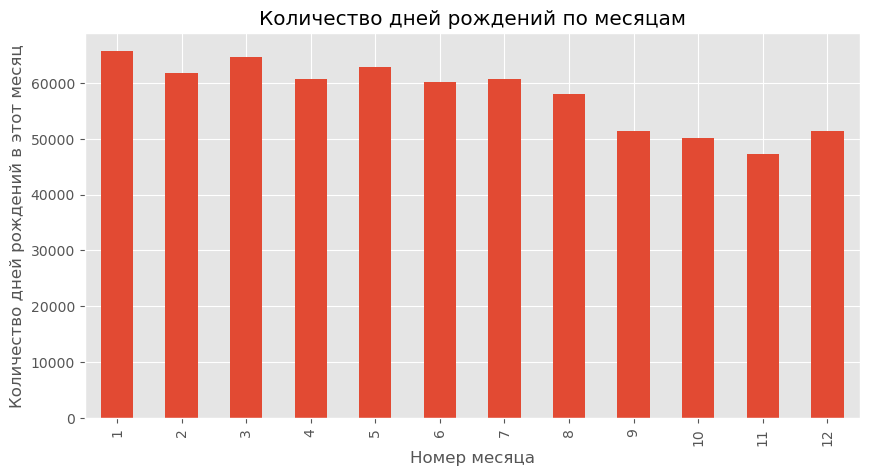

In [100]:
plt.figure(figsize=(10, 5))

ax = df.bmonth.value_counts().sort_index().plot(kind='bar');

ax.set_title('Количество дней рождений по месяцам')
ax.set_xlabel('Номер месяца')
ax.set_ylabel('Количество дней рождений в этот месяц');

Эмпирически оценим вероятность того, что в группе из 50 произвольных людей найдутся хотя бы двое с одинаковым днём рождения.

In [101]:
df.sample(5) # выборка в 5 человек

,city,first_name,id,sex,byear,bmonth,bday,bdate
565869,Иваново,Артур,152035062,2,<NA>,3,3,3-3
838203,NaN,Ирина,162411166,1,<NA>,7,23,23-7
283259,NaN,Назар,192172265,2,<NA>,2,9,9-2
232742,Roma,Gianni,226582650,2,1972,1,17,17-1
885145,Черновцы,Дмитро,204206687,2,<NA>,9,25,25-9


In [102]:
# если уникальных дат меньше 50 => совпадение
df.bdate.sample(50).unique().size 

45

In [103]:
n = 10**4  # число симуляций 
m = 0      # счётчик для наших событий

for i in tqdm(range(n)):
    m += df.bdate.sample(50).unique().size < 50

  0%|          | 0/10000 [00:00<?, ?it/s]

In [104]:
m/n # итоговая вероятность 

0.9769

Похоже на правду. 